In [ ]:
# Sage

Issue: What is wrong with G62 ? breaks old 

Are the k33 breaks enough in degree 0 (to construct the poltope), i think so, we dont care about degree just need to check the size of the polytope.
are thesee break divisors?

We only need break divisors for Graphs if want to construct the $R_\sigma$ for line bundles. In the other case we have the zero assignment on trees.

We want to do this as dim$R_\sigma$ will be suggestive of dim$R_\sigma^{\Gamma_i}$ if nicolas conjecture is true. 

# Outline

# Functions

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import pickle
#See paper for Gi graphs.

In [13]:
def get_sp_trees(G): #Out: list of edges in spanning tree
    all_trees=[]
    for g in list(G.spanning_trees()):
        edges_red=[]
        edges=list(g.edges())
        for edge in edges:
            lst_ed=list(edge)
            lst_ed.pop(lst_ed.index(None))
            edges_red.append(lst_ed)
        all_trees.append(edges_red)
    return all_trees

In [14]:
from collections import Counter

def list_difference(a, b):
    "https://stackoverflow.com/questions/8106227/difference-between-two-lists-with-duplicates-in-python"
    count = Counter(a) # count items in a
    count.subtract(b)  # subtract items that are in b
    diff = []
    for x in a:
        if count[x] > 0:
           count[x] -= 1
           diff.append(x)
    return diff

In [15]:
#Attempt using recurison

def chip_adding(graph,tree,ass):
    """
    Inputs:
    graph,
    tree : spanning tree of graph
    ass : an n=vert(graph) tuple on the spanning tree.
    
    recursion idea: https://stackoverflow.com/questions/53638816/python-library-function-to-re-apply-a-function-to-its-own-output-until-output-re
    """
    
    edges=graph # just want the edges 
    n=len(ass)
    complement=list_difference(graph,tree)
    # print("complement",complement)

    def rec_funct(edge_l,inputs,n):
        data=[]
        edge=edge_l[0]
        
        for b in inputs:
            # print("b term",b)
            delta_1=np.zeros(n)
            delta_2=np.zeros(n)

            delta_1[int(edge[0])-1]=1 #we chip add at the first vertex.
            delta_2[int(edge[1])-1]=1 #we chip add at the second vertex.
            
            b1=b+delta_1
            b2=b+delta_2
            data=data+[b1,b2]
        
        
        # print("partial breaks",data)
        # print("-----------------next recursion--------------------")

        return (edge_l,data,n)
    
    def recursion(edge_l,inputs,n):

        new_data=rec_funct(edge_l,inputs,n)
        edge_l=edge_l[1:] #removeing first edge
        # print("edges left after removing one:",edge_l)
        
        new_data=(edge_l,new_data[1],new_data[2])
        
        
        # list(new_data)[1]=edge_l# changing edge
        
        if len(edge_l)==0:
            new_inputs=new_data[1]
            return new_inputs
        else:
            return recursion(*new_data)
        
    breaks=recursion(complement,[np.zeros(n)],n)
    breaks=np.unique(breaks, axis=0)
    
    return breaks

In [66]:
def get_breaks_old(graph,edges,ass): #doesnt work
    """
    Inputs:
    graph: #gr_G62= Graph([("1","2"),("2","3"),("3","4"),("4","5"),("5","6"),("1","6"),("2","6")], multiedges=True)
    edges: edges of graph #G62=[("1","2"),("2","3"),("3","4"),("4","5"),("5","6"),("1","6"),("2","6")]
    ass: tuples of zeros for length the number of verts of graph
    
    Output: returns union of break divisors over all trees.
    """
    
    spanning_tree_lst=get_sp_trees(graph)
    breaks=[]
    for tree in spanning_tree_lst:
        tree=list(tree)
        tree=[tuple(x) for x in tree]
        breaks=breaks+list(chip_adding(edges,tree,ass))
        
    breaks=np.unique(breaks,axis=0)
    
    return breaks

In [75]:
def get_breaks(g,shift):
    """
    g=graph for sandpile
    output: returns breaks
    """
    
    S=Sandpile(g,0)
    reps=S.jacobian_representatives(False) #degree 0
    shift=np.array(shift)

    breaks_shift=[list(np.array(x)+shift) for x in reps]
    
    
    return breaks_shift

# Examples

In [114]:
G1_gr=Graph([("1","2"),("2","3"),("1","3"),("1","3")], multiedges=True)

# print(G1_gr.genus())
G1=[("1","2"),("2","3"),("1","3"),("1","3")]
# tree=[("1","2"),("2","3")]
tree=[("1","2"),("1","3")]
# print(chip_adding(G1,tree,[0,0,0]))

# print(list_difference(G1, tree)) #[('2', '3'), ('1', '3')]

print(f"Break divisors degree 2: \n {get_breaks_old(G1_gr,G1,[0,0,0])} ")

g={0:{2:1,3:2},
   2:{0:1,3:1,},
   3:{0:2,2:1}}

print(get_breaks(g,[2,0,0]))
l=get_breaks(g,[2,0,0])


# for i in l:
#     print(list(i))

0
Break divisors degree 2: 
 [[0. 0. 2.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [2. 0. 0.]] 
[[2, 0, 0], [0, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 2]]


In [98]:
G4=Graph([("1","2"),("2","3"),("3","4"),("1","4")], multiedges=True)
G4_ed=[("1","2"),("2","3"),("3","4"),("1","4")]
# tree=[("1","2"),("2","3")]
tree=[("1","2"),("1","3")]

print(f"Break divisors degree 1: \n {get_breaks_old(G4,G4_ed,[0,0,0,0])} ")

g={0:{2:1,4:1},
   2:{0:1,3:1,},
   3:{2:1,4:1},
  4:{3:1,0:1}}

print("----")

print(get_breaks(g,[1,0,0,0]))

# l=get_breaks(g,[2,0,0,0])


# for i in l:
#     print(list(i))

Break divisors degree 1: 
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]] 
----
[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


In [ ]:
# #G63
# g={0:{2:1,6:1},
#    2:{0:1,3:1,},
#    3:{2:1,4:1,6:1},
#    4:{3:1,5:1},
#    5:{4:1,6:1},
#    6:{5:1,0:1,3:1}}
S=Sandpile(g,0)
reps=S.jacobian_representatives(False) #degree 0

In [ ]:
# #G72
g={0:{2:1,7:1},2:{0:1,3:1,7:1},3:{2:1,4:1},4:{3:1,5:1},5:{4:1,6:1},6:{5:1,7:1},7:{0:1,2:1,6:1}}
S=Sandpile(g,0)
reps=S.jacobian_representatives(False) #degree 0

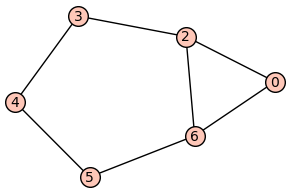

In [56]:
# #G73
# g={0:{2:1,7:1},2:{0:1,3:1},3:{2:1,4:1,7:1},4:{3:1,5:1},5:{4:1,6:1},6:{5:1,7:1},7:{0:1,3:1,6:1}}
S=Sandpile(g,0)
reps=S.jacobian_representatives(False) #degree 0

Want to get all break divisors so need to iterate over all trees 

## G62: Issue

We could try rotating so the break divs we calculated via trees is the same as the sandpile representatives once shifted to have same total degree.

In [126]:
gr_G62= Graph([("1","2"),("2","3"),("3","4"),("4","5"),("5","6"),("1","6"),("2","6")], multiedges=True)
G62=[("1","2"),("2","3"),("3","4"),("4","5"),("5","6"),("1","6"),("2","6")]
# print("Number of spanning trees: ",len(list(gr_G62.spanning_trees() )))

# print(f"Number of break divisors: {len(get_breaks_old(gr_G62,G62,[0,0,0,0,0,0]))} ")
# print(f"break divisors: {get_breaks_old(gr_G62,G62,[0,0,0,0,0,0])} ")


#G62
g={0:{2:1,6:1},
   2:{0:1,3:1,6:1},
   3:{2:1,4:1},
   4:{3:1,5:1},
   5:{4:1,6:1},
   6:{5:1,0:1,2:1}}

# print("from reps : breaks")
# # print(get_breaks(g,[2,0,0,0,0,0]))
# l=get_breaks(g,[2,0,0,0,0,0])

# for i in l:
#     print(i)

# print("old breaks")
# prev_b=get_breaks_old(gr_G62,G62,[0,0,0,0,0,0])
# # arr=np.array(l)

# # print("--")
# # print(prev_b)
# # print("--")

# # print(arr)

# # for i in arr:
# #     if i in prev_b:
# #         print(true)
# #         print(f"{i}")

# # print(l[0]==list(prev_b[0]))

## G455_exedge

Construct by hand breaks and compare.

In [111]:
G455_exedge=Graph([("1","2"),("2","3"),("3","4"),("4","1"),("1","3"),("2","4")], multiedges=True)
G455_exedge_edges=[("1","2"),("2","3"),("3","4"),("4","1"),("1","3"),("2","4")]
# get_sp_trees(G455_exedge)
# print("Number of spanning trees: ",len(list(G455_exedge.spanning_trees() )))
# print(f"Number of break divisors: {len(get_breaks(G455_exedge,G455_exedge_edges,[0,0,0,0]))} ") #wrong

Number of spanning trees:  16


TypeError: get_breaks() takes 2 positional arguments but 3 were given

In [109]:
# G455_exedge

g={0:{2:1,3:1,4:1},
   2:{0:1,3:1,4:1},
   3:{0:1,2:1,4:1},
   4:{0:1,2:1,3:1}}

S=Sandpile(g,0)

breaks=get_breaks(g,[0,0,0,0])
# print(len(l))

# for i in l:
#     print(i)

16
[0, 0, 0, 0]
[-2, 1, 1, 0]
[-2, 0, 0, 2]
[-1, 0, 0, 1]
[-3, 1, 0, 2]
[-3, 0, 2, 1]
[-2, 0, 2, 0]
[-3, 2, 0, 1]
[-2, 2, 0, 0]
[-3, 0, 1, 2]
[-3, 2, 1, 0]
[-3, 1, 2, 0]
[-1, 1, 0, 0]
[-1, 0, 1, 0]
[-2, 1, 0, 1]
[-2, 0, 1, 1]


In [ ]:
# with open('G455_exedge.txt', 'wb') as fp:
#     pickle.dump(breaks, fp)
#     fp.close()

## $K_{33}$

In [115]:
K_33= Graph([("1","4"),("1","5"),("1","6"),("2","4"),("2","5"),("2","6"),("3","4"),("3","5"),("3","6"),], multiedges=True)
# print(K_33.genus()) #1
# get_sp_trees(K_33)
# print("Number of spanning trees: ",len(list(K_33.spanning_trees() )))

In [125]:
#K33

g={0:{4:1,5:1,6:1},
   2:{4:1,5:1,6:1},
   3:{4:1,5:1,6:1},
   4:{0:1,2:1,3:1},
   5:{0:1,2:1,3:1},
   6:{0:1,2:1,3:1}}

S=Sandpile(g,0)

breaks=get_breaks(g,[0,0,0,0,0,0])

# for i in l:
#     print(i)

In [ ]:
# with open('K33.txt', 'wb') as fp:
#     pickle.dump(breaks, fp)
#     fp.close()